In [1]:
#load images
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks
import matplotlib.pyplot as plt 
from PIL import Image
import os
%matplotlib inline

2023-08-29 12:24:33.187607: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 12:24:33.295743: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-29 12:24:33.295762: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-08-29 12:24:33.318100: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-29 12:24:34.076144: W tensorflow/stream_executor/platform/de

## Convert files to .jpeg

### Convert training-data

In [ ]:
#Code for converting .jpg images to .jpeg
# Define the directory path containing PNG images
dirs = ['clean', 'dust','bird','electrical', 'physical_damaged','solar']

for dir in dirs:
    directory_path = f"raw_data/training-data/{dir}"
    
    # Iterate through the directory and convert images
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith(".jpg"):
                # Load the image
                img_path = os.path.join(root, file)
                img = Image.open(img_path)
                
                # Convert the image to RGB mode
                img = img.convert("RGB")
                
                # Define the new file path with the .jpeg extension
                new_img_path = os.path.splitext(img_path)[0] + ".jpeg"
                
                # Save the image in JPEG format
                img.save(new_img_path, "JPEG")
                
                # Close the image to free resources
                img.close()
    
    print("Image format conversion complete.")

### Convert test-data

In [ ]:
# Define the directory path containing PNG images
dirs = ['clean', 'dust','bird','electrical', 'physical_damaged','solar']

for dir in dirs:
    directory_path = f"raw_data/test-data/{dir}"
    
    # Iterate through the directory and convert images
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith(".jpg"):
                # Load the image
                img_path = os.path.join(root, file)
                img = Image.open(img_path)
                
                # Convert the image to RGB mode
                img = img.convert("RGB")
                
                # Define the new file path with the .jpeg extension
                new_img_path = os.path.splitext(img_path)[0] + ".jpeg"
                
                # Save the image in JPEG format
                img.save(new_img_path, "JPEG")
                
                # Close the image to free resources
                img.close()
    
    print("Image format conversion complete.")

### Delete .jpg files in training-data

In [ ]:
# Define the directory path
# Define the directory path containing PNG images
dirs = ['clean', 'dust','bird','electrical', 'physical_damaged','solar']

for dir in dirs:
    directory_path = f"raw_data/training-data/{dir}"

    # Iterate through the directory and delete JPG files
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith(".jpg"):
                file_path = os.path.join(root, file)
                os.remove(file_path)
                print(f"Deleted: {file_path}")
    
    print("Deletion complete.")

### Delete .jpg file in test-data

In [ ]:
# Define the directory path
# Define the directory path containing PNG images
dirs = ['clean', 'dust','bird','electrical', 'physical_damaged','solar']

for dir in dirs:
    directory_path = f"raw_data/test-data/{dir}"

    # Iterate through the directory and delete JPG files
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith(".jpg"):
                file_path = os.path.join(root, file)
                os.remove(file_path)
                print(f"Deleted: {file_path}")
    
    print("Deletion complete.")

### Delete Zone.Identifier

In [ ]:
# Define the directory path
dirs = ['clean', 'dust','bird','electrical', 'physical_damaged','solar']
for dir in dirs:
    directory_path = f"raw_data/training-data/{dir}"

    # Iterate through the directory and delete Zone.Identifier files
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            print(file)
            if file.endswith("Zone.Identifier"):
                file_path = os.path.join(root, file)
                os.remove(file_path)
                print(f"Deleted: {file_path}")

    print("Deletion of Zone.Identifier files complete.")

In [ ]:
# Define the directory path
dirs = ['clean', 'dust','bird','electrical', 'physical_damaged','solar']
for dir in dirs:
    directory_path = f"raw_data/test-data/{dir}"

    # Iterate through the directory and delete Zone.Identifier files
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            print(file)
            if file.endswith("Zone.Identifier"):
                file_path = os.path.join(root, file)
                os.remove(file_path)
                print(f"Deleted: {file_path}")

    print("Deletion of Zone.Identifier files complete.")

In [ ]:
# Define the directory path
directory_path = "raw_data/training-data"

# List all files in the directory
file_list = []

for root, dirs, files in os.walk(directory_path):
    for file in files:
        file_path = os.path.join(root, file)
        file_list.append(file_path)

# Print the list of file paths
for file_path in file_list:
    print(file_path)
print(len(file_list))    


## Load images

In [29]:
batch_size = 16
train_data_dir = "raw_data/training-data-binary/"
#test_data_dir = "raw_data/test-data-binary/"

train_ds = image_dataset_from_directory(
  train_data_dir,
  labels = "inferred",
  label_mode = "binary",
  #class_names = ['clean','dust'],  
  seed=123,
  image_size=(225, 225),
  batch_size=batch_size,
  validation_split=0.2,
  subset='both'
) 

train_data = train_ds[0]
val_data = train_ds[1]

# We define a second one for the test data

# val_ds = image_dataset_from_directory(
#    test_data_dir,
#    labels = "inferred",
#    label_mode = "binary",
#    seed=123,
#    image_size=(225, 225),
#    batch_size=batch_size
#  )

Found 295 files belonging to 2 classes.
Using 236 files for training.
Using 59 files for validation.


In [32]:
class_names = train_data.class_names
print(class_names)

class_names = val_data.class_names
print(class_names)
len(train_ds)

['clean', 'dust']
['clean', 'dust']


2

## Binary Model: clean vs dust

In [33]:
# We'll use a model with the same convolutional layers, but we'll add Augmentation layers before that

model_2 = Sequential()

model_2.add(layers.Rescaling(1./255, input_shape = (225, 225, 3)))

# Data Augmentation Layers

model_2.add(layers.RandomFlip("horizontal"))
model_2.add(layers.RandomZoom(0.1))
model_2.add(layers.RandomTranslation(0.2, 0.2))
model_2.add(layers.RandomRotation(0.1))


# Convolutional Layers

model_2.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding = "same"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )


model_2.add(layers.Conv2D(filters = 32, kernel_size = (3,3), input_shape = (225, 225, 3), activation="relu", padding = "same"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )


model_2.add(layers.Conv2D(filters = 64, kernel_size = (3,3), input_shape = (225, 225, 3), activation="relu", padding = "same"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

model_2.add(layers.Conv2D(filters = 128, kernel_size = (3,3), input_shape = (225, 225, 3), activation="relu", padding = "same"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

model_2.add(layers.Flatten())

model_2.add(layers.Dense(64, activation="relu"))

model_2.add(layers.Dropout(0.5))

model_2.add(layers.Dense(1, activation="sigmoid"))

In [34]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 225, 225, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 225, 225, 3)       0         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 225, 225, 3)       0         
                                                                 
 random_translation_1 (Rando  (None, 225, 225, 3)      0         
 mTranslation)                                                   
                                                                 
 random_rotation_1 (RandomRo  (None, 225, 225, 3)      0         
 tation)                                                         
                                                                 
 conv2d_4 (Conv2D)           (None, 225, 225, 32)     

In [35]:
adam = optimizers.Adam(learning_rate = 0.001)

model_2.compile(loss= 'binary_crossentropy', #'categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

In [36]:
MODEL = "model_2"

modelCheckpoint = callbacks.ModelCheckpoint("{}.h5".format(MODEL), monitor="val_loss", verbose=0, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)

In [37]:
%%time

history_2 = model_2.fit(
        train_data,
        epochs=30,
        validation_data=val_data,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper]
        )

Epoch 1/30
15/15 [==============================] - 14s 598ms/step - loss: 0.7300 - accuracy: 0.5339 - val_loss: 0.6089 - val_accuracy: 0.7627 - lr: 0.0010
Epoch 2/30
15/15 [==============================] - 10s 639ms/step - loss: 0.6290 - accuracy: 0.7331 - val_loss: 0.5202 - val_accuracy: 0.7288 - lr: 0.0010
Epoch 3/30
15/15 [==============================] - 10s 616ms/step - loss: 0.5424 - accuracy: 0.7585 - val_loss: 0.4608 - val_accuracy: 0.8305 - lr: 0.0010
Epoch 4/30
15/15 [==============================] - 10s 649ms/step - loss: 0.4416 - accuracy: 0.8178 - val_loss: 0.9029 - val_accuracy: 0.7458 - lr: 0.0010
Epoch 5/30
15/15 [==============================] - 11s 716ms/step - loss: 0.4126 - accuracy: 0.8347 - val_loss: 0.7079 - val_accuracy: 0.7458 - lr: 0.0010
Epoch 6/30
15/15 [==============================] - ETA: 0s - loss: 0.4066 - accuracy: 0.8220
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
15/15 [==============================] - 11s 697m

### Plot history

In [38]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

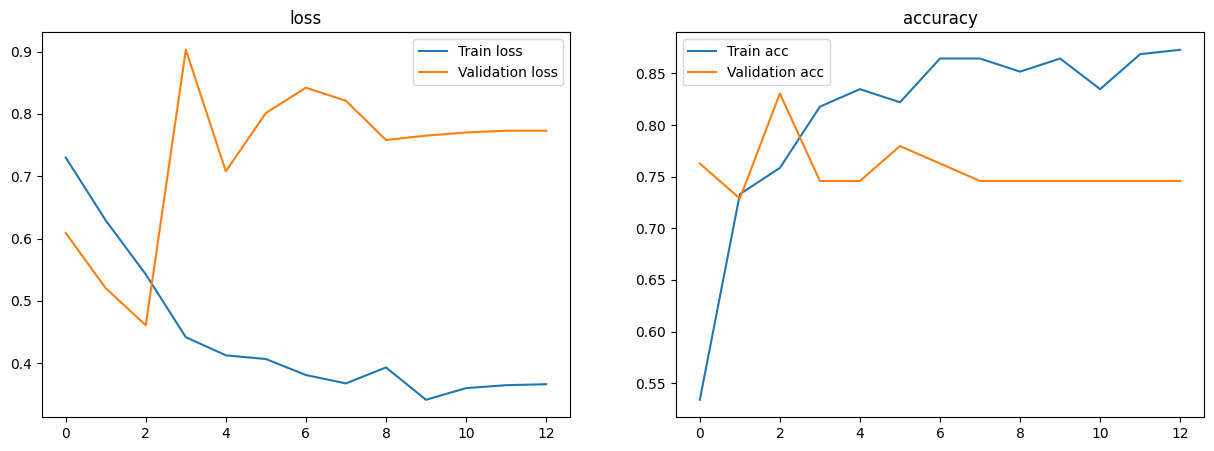

In [39]:
plot_history(history_2)

## Multi class Model

In [84]:
# We'll use a model with the same convolutional layers, but we'll add Augmentation layers before that

model_multi = Sequential()

model_multi.add(layers.Rescaling(1./255, input_shape = (225, 225, 3)))

# Data Augmentation Layers

model_multi.add(layers.RandomFlip("horizontal"))
model_multi.add(layers.RandomZoom(0.1))
model_multi.add(layers.RandomTranslation(0.2, 0.2))
model_multi.add(layers.RandomRotation(0.1))


# Convolutional Layers

model_multi.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding = "same"))
model_multi.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )


model_multi.add(layers.Conv2D(filters = 32, kernel_size = (3,3), input_shape = (225, 225, 3), activation="relu", padding = "same"))
model_multi.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )


model_multi.add(layers.Conv2D(filters = 64, kernel_size = (3,3), input_shape = (225, 225, 3), activation="relu", padding = "same"))
model_multi.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

model_multi.add(layers.Conv2D(filters = 128, kernel_size = (3,3), input_shape = (225, 225, 3), activation="relu", padding = "same"))
model_multi.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

model_multi.add(layers.Flatten())

model_multi.add(layers.Dense(64, activation="relu"))

model_multi.add(layers.Dropout(0.5))

model_multi.add(layers.Dense(6, activation="softmax"))

In [85]:
model_multi.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 225, 225, 3)       0         
                                                                 
 random_flip_3 (RandomFlip)  (None, 225, 225, 3)       0         
                                                                 
 random_zoom_3 (RandomZoom)  (None, 225, 225, 3)       0         
                                                                 
 random_translation_3 (Rando  (None, 225, 225, 3)      0         
 mTranslation)                                                   
                                                                 
 random_rotation_3 (RandomRo  (None, 225, 225, 3)      0         
 tation)                                                         
                                                                 
 conv2d_12 (Conv2D)          (None, 225, 225, 32)     

In [86]:
adam = optimizers.Adam(learning_rate = 0.001)

model_multi.compile(loss= 'categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

In [87]:
MODEL = "model_multi"

modelCheckpoint = callbacks.ModelCheckpoint("{}.h5".format(MODEL), monitor="val_loss", verbose=0, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)

In [88]:
#Data for multiclass model
batch_size = 16
train_data_dir = "raw_data/training-data/"
#test_data_dir = "raw_data/test-data-binary/"

train_ds = image_dataset_from_directory(
  train_data_dir,
  labels = "inferred",
  label_mode = "categorical",
  #class_names = ['clean','dust'],  
  seed=123,
  image_size=(225, 225),
  batch_size=batch_size,
  validation_split=0.2,
  subset='both'
) 

train_data = train_ds[0]
val_data = train_ds[1]



Found 636 files belonging to 6 classes.
Using 509 files for training.
Using 127 files for validation.


In [89]:
%%time

history_multi = model_multi.fit(
        train_data,
        epochs=30,
        validation_data=val_data,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper]
        class_weight={},
        )

Epoch 1/30
32/32 [==============================] - 25s 635ms/step - loss: 1.8350 - accuracy: 0.1925 - val_loss: 1.7058 - val_accuracy: 0.4094 - lr: 0.0010
Epoch 2/30
32/32 [==============================] - 23s 694ms/step - loss: 1.6601 - accuracy: 0.3026 - val_loss: 1.6076 - val_accuracy: 0.3780 - lr: 0.0010
Epoch 3/30
32/32 [==============================] - 24s 741ms/step - loss: 1.6310 - accuracy: 0.3517 - val_loss: 1.5639 - val_accuracy: 0.4094 - lr: 0.0010
Epoch 4/30
32/32 [==============================] - 23s 705ms/step - loss: 1.6009 - accuracy: 0.3477 - val_loss: 1.6041 - val_accuracy: 0.3937 - lr: 0.0010
Epoch 5/30
32/32 [==============================] - 25s 753ms/step - loss: 1.5788 - accuracy: 0.3635 - val_loss: 1.7814 - val_accuracy: 0.2441 - lr: 0.0010
Epoch 6/30
32/32 [==============================] - ETA: 0s - loss: 1.5691 - accuracy: 0.3576
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
32/32 [==============================] - 24s 720m

In [95]:
class_names = train_data.class_names
class_names

['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']

### Helper functions

In [40]:
def find_index_of_max_element(input_list):
    max_value = max(input_list)
    max_index = input_list.index(max_value)
    return max_index


In [41]:
type(class_names)

list

In [96]:
def predictImage_multiclass(url, model):

  # Takes an image and a model

  img = url
  img = img_to_array(img)
  img = img.reshape((-1, 225, 225, 3))
  res = model.predict(img)
  print(f"Probabilities: ")
  names_of_classes = class_names
  print(f"{names_of_classes}")
  print(f"{res[0]}")
  print(f"Result: {names_of_classes[find_index_of_max_element(res[0].tolist())]}")  
  return res  

In [74]:
def predictImage_binary(url, model):

  # Takes an imafe and a model

  img = url
  img = img_to_array(img)
  img = img.reshape((-1, 225, 225, 3))
  res = model.predict(img)
  print(f"Probabilities: ")
  print(f"{res[0]}")  
  res = model.predict(img)[0][0]
  if(res < 0.5):
    pred_class = "clean"
    prob = 1-res
  if(res >= 0.5):
    pred_class = "dust"
    prob = res

  print("Class : ", pred_class)
  print("probability = ",prob)

In [70]:
def predictImage_2(url, model):

  # Takes an imafe and a model

  img = url
  img = img_to_array(img)
  img = img.reshape((-1, 225, 225, 3))
  res = model.predict(img)[0][0]
  if(res < 0.5):
    animal = "cat"
    prob = 1-res
  if(res >= 0.5):
    animal = "dog"
    prob = res

  print("Animal : ", animal)
  print("probability = ",prob)

# Image investigation

 ### Class: Bird

1/1 [==============================] - 0s 39ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.15687606 0.5432136  0.04631475 0.12385645 0.06555244 0.06418674]
Result: clean


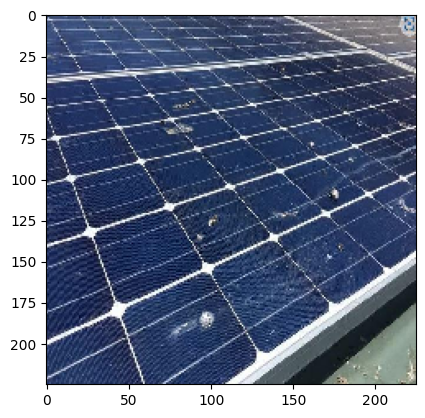

In [97]:
img_bird = load_img(f"raw_data/training-data/bird/Bird (1).jpeg", target_size=(225, 225))
predictImage_multiclass(img_bird,model_multi)
plt.imshow(img_bird);

1/1 [==============================] - 0s 37ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.1610817  0.16782926 0.17683807 0.1640615  0.1575539  0.17263554]
Result: dust


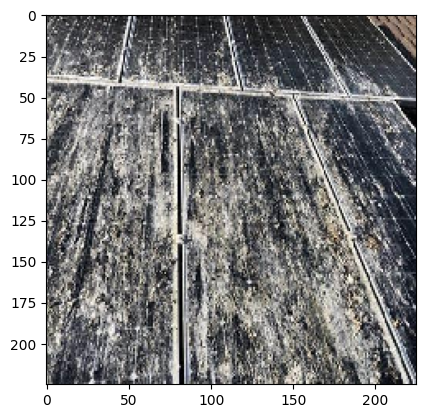

In [98]:
img_bird = load_img(f"raw_data/training-data/bird/Bird (5).jpeg", target_size=(225, 225))
predictImage_multiclass(img_bird,model_multi)
plt.imshow(img_bird);

1/1 [==============================] - 0s 40ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.21933678 0.40992618 0.09625665 0.09968771 0.07913522 0.09565748]
Result: clean


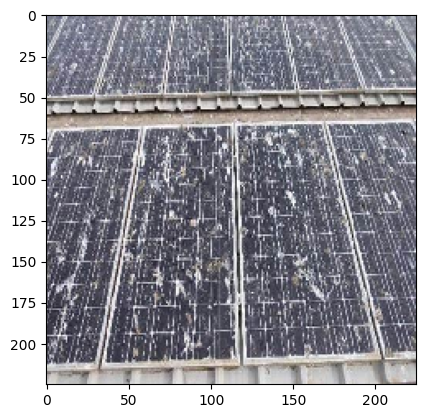

In [99]:
img_bird = load_img(f"raw_data/training-data/bird/Bird (18).jpeg", target_size=(225, 225))
predictImage_multiclass(img_bird,model_multi)
plt.imshow(img_bird);

1/1 [==============================] - 0s 40ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.31152406 0.22377059 0.21512794 0.07441907 0.04278282 0.13237546]
Result: bird


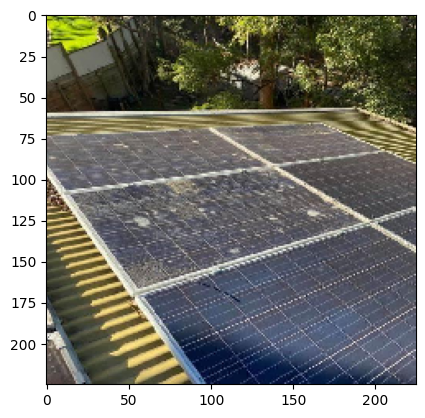

In [100]:
img_bird = load_img(f"raw_data/training-data/bird/Bird (22).jpeg", target_size=(225, 225))
predictImage_multiclass(img_bird,model_multi)
plt.imshow(img_bird);

1/1 [==============================] - 0s 38ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.18830943 0.20746869 0.15388015 0.16122988 0.14439718 0.14471462]
Result: clean


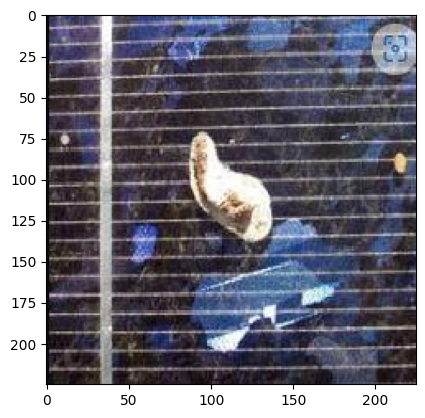

In [101]:
img_bird = load_img(f"raw_data/training-data/bird/Bird (37).jpeg", target_size=(225, 225))
predictImage_multiclass(img_bird,model_multi)
plt.imshow(img_bird);

1/1 [==============================] - 0s 40ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[9.2905708e-02 9.0075725e-01 7.6349330e-04 3.0694413e-03 1.5251607e-03
 9.7900513e-04]
Result: clean


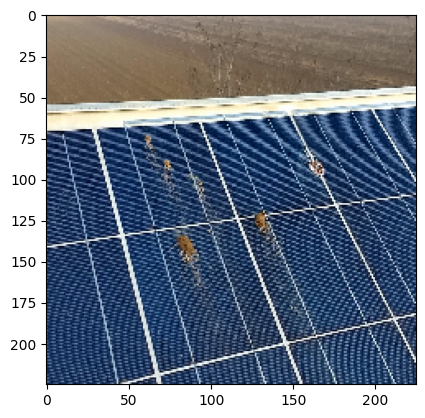

In [102]:
img_bird = load_img(f"raw_data/training-data/bird/Bird (39).jpeg", target_size=(225, 225))
predictImage_multiclass(img_bird,model_multi)
plt.imshow(img_bird);

 ### Class: clean 

1/1 [==============================] - 0s 39ms/step
Probabilities: 
[0.02736336]
1/1 [==============================] - 0s 37ms/step
Class :  clean
probability =  0.9726366437971592


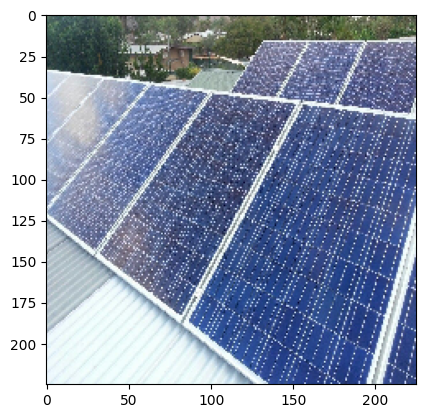

In [75]:
img_clean_1 = load_img(f"raw_data/training-data/clean/Cleaan (4).jpeg", target_size=(225, 225))
predictImage_binary(img_clean_1,model_2)
plt.imshow(img_clean_1);

1/1 [==============================] - 0s 39ms/step
Probabilities: 
[0.00338192]
1/1 [==============================] - 0s 24ms/step
Class :  clean
probability =  0.9966180848423392


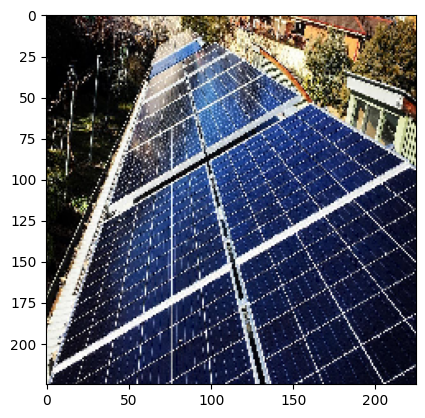

In [76]:
img_clean_2 = load_img(f"raw_data/training-data/clean/Cleaan (15).jpeg", target_size=(225, 225))
predictImage_binary(img_clean_2,model_2)
plt.imshow(img_clean_2);

1/1 [==============================] - 0s 39ms/step
Probabilities: 
[0.31472817]
1/1 [==============================] - 0s 38ms/step
Class :  clean
probability =  0.685271829366684


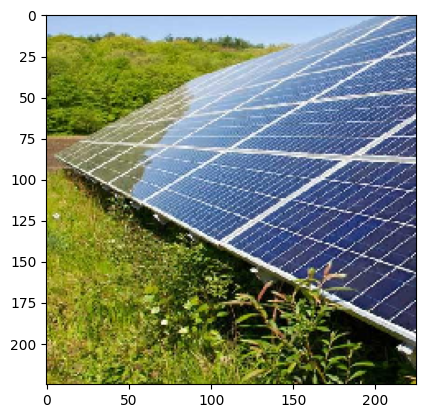

In [77]:
img_clean_3 = load_img(f"raw_data/training-data/clean/Cleaan (56).jpeg", target_size=(225, 225))
predictImage_binary(img_clean_3,model_2)
plt.imshow(img_clean_3);

### Class: physical-damage

1/1 [==============================] - 0s 40ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.21545294 0.4277666  0.08554871 0.1180056  0.08691144 0.06631476]
Result: clean


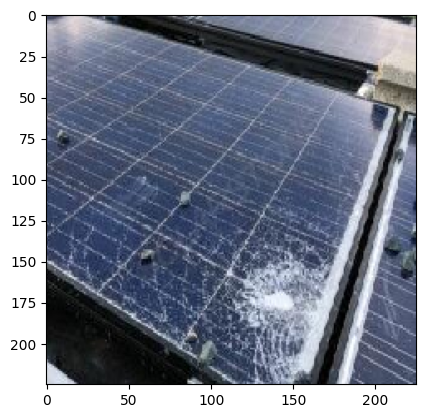

In [103]:
img_physical = load_img(f"raw_data/training-data/physical_damaged/Physical-damaged (1).jpeg", target_size=(225, 225))
predictImage_multiclass(img_physical,model_multi)
plt.imshow(img_physical);

1/1 [==============================] - 0s 40ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.13331576 0.24224953 0.1353132  0.17859487 0.1255308  0.18499586]
Result: clean


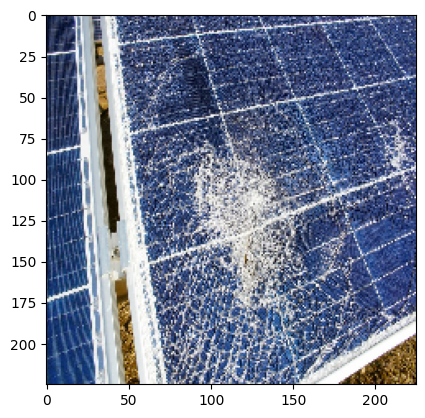

In [104]:
img_physical = load_img(f"raw_data/training-data/physical_damaged/Physical-damaged (20).jpeg", target_size=(225, 225))
predictImage_multiclass(img_physical,model_multi)
plt.imshow(img_physical);

1/1 [==============================] - 0s 25ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.19751589 0.49963662 0.05215747 0.11729538 0.07257141 0.06082319]
Result: clean


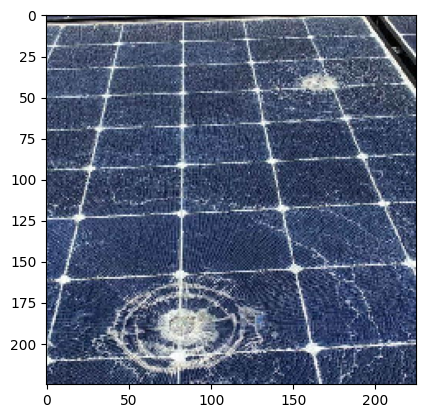

In [105]:
img_physical = load_img(f"raw_data/training-data/physical_damaged/Physical-damaged (35).jpeg", target_size=(225, 225))
predictImage_multiclass(img_physical,model_multi)
plt.imshow(img_physical);

### Class: electrical

1/1 [==============================] - 0s 24ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.2587755  0.10847487 0.3097884  0.11594615 0.06346775 0.14354731]
Result: dust


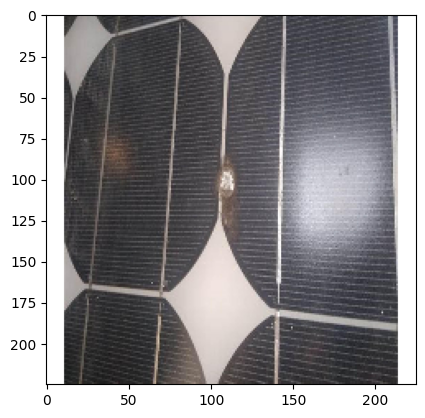

In [106]:
img_electrical = load_img(f"raw_data/training-data/electrical/Electrical (28).jpeg", target_size=(225, 225))
predictImage_multiclass(img_electrical,model_multi)
plt.imshow(img_electrical);

1/1 [==============================] - 0s 40ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.19711652 0.234319   0.1319621  0.17092203 0.14644973 0.11923058]
Result: clean


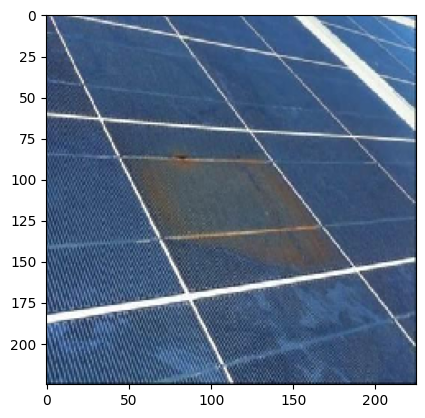

In [118]:
img_electrical = load_img(f"raw_data/training-data/electrical/Electrical (29).jpeg", target_size=(225, 225))
predictImage_multiclass(img_electrical,model_multi)
plt.imshow(img_electrical);

### Class: snow

1/1 [==============================] - 0s 40ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.17316936 0.2776727  0.14604501 0.07518068 0.07553597 0.25239626]
Result: clean


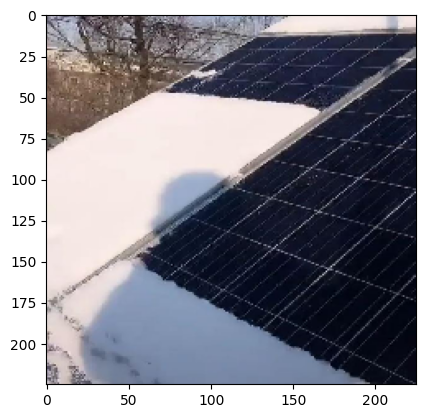

In [107]:
img_snow = load_img(f"raw_data/training-data/solar/Solar (28).jpeg", target_size=(225, 225))
predictImage_multiclass(img_snow,model_multi)
plt.imshow(img_snow);

1/1 [==============================] - 0s 24ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.20470157 0.23126873 0.19944088 0.0892627  0.07395461 0.20137152]
Result: clean


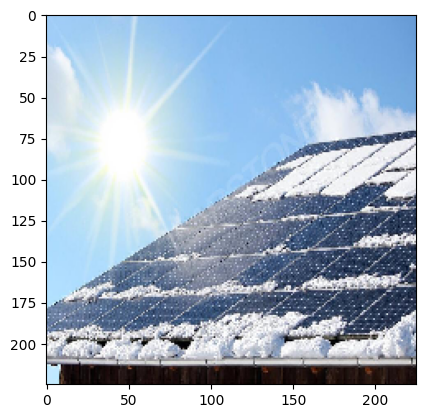

In [108]:
img_snow = load_img(f"raw_data/training-data/solar/Solar (3).jpeg", target_size=(225, 225))
predictImage_multiclass(img_snow,model_multi)
plt.imshow(img_snow);

1/1 [==============================] - 0s 26ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.1476375  0.2401379  0.15789974 0.11428107 0.11063598 0.22940776]
Result: clean


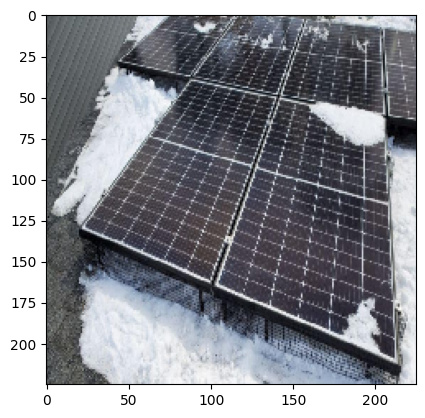

In [109]:
img_snow = load_img(f"raw_data/training-data/solar/Solar (33).jpeg", target_size=(225, 225))
predictImage_multiclass(img_snow,model_multi)
plt.imshow(img_snow);

### Class: dust

1/1 [==============================] - 0s 42ms/step
Probabilities: 
[0.8201592]
1/1 [==============================] - 0s 38ms/step
Class :  dust
probability =  0.8201592


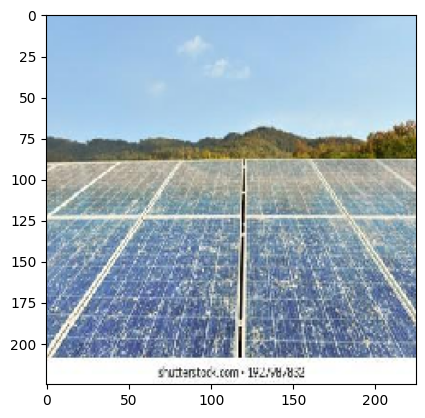

In [78]:
img_clean_2 = load_img(f"raw_data/training-data/dust/Dust (15).jpeg", target_size=(225, 225))
predictImage_binary(img_clean_2,model_2)
plt.imshow(img_clean_2);

1/1 [==============================] - 0s 39ms/step
Probabilities: 
[0.8169373]
1/1 [==============================] - 0s 24ms/step
Class :  dust
probability =  0.8169373


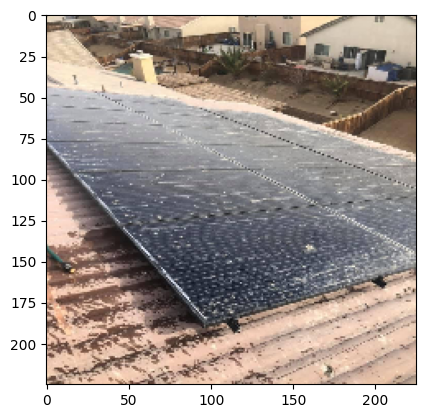

In [79]:
img_clean_2 = load_img(f"raw_data/training-data/dust/Dust (70).jpeg", target_size=(225, 225))
predictImage_binary(img_clean_2,model_2)
plt.imshow(img_clean_2);

1/1 [==============================] - 0s 44ms/step
Probabilities: 
[0.54995185]
1/1 [==============================] - 0s 44ms/step
Class :  dust
probability =  0.54995185


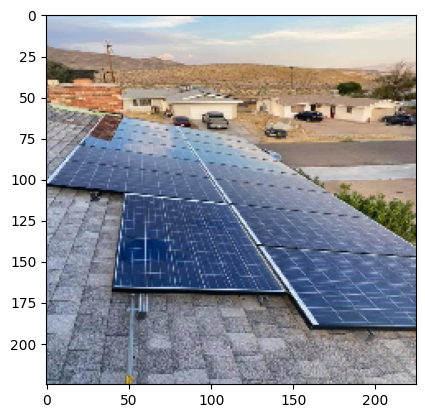

In [80]:
img_clean_2 = load_img(f"raw_data/training-data/dust/Dust (84).jpeg", target_size=(225, 225))
predictImage_binary(img_clean_2,model_2)
plt.imshow(img_clean_2);

1/1 [==============================] - 0s 34ms/step
Probabilities: 
[0.42328078]
1/1 [==============================] - 0s 36ms/step
Class :  clean
probability =  0.5767192244529724


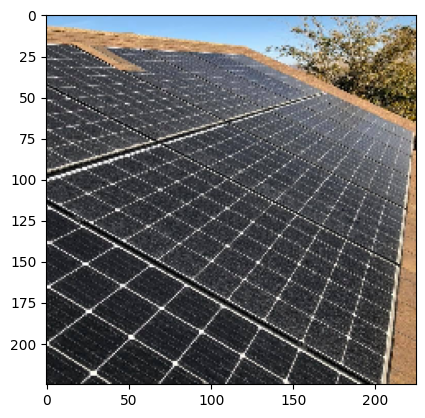

In [81]:
img_clean_2 = load_img(f"raw_data/training-data/dust/Dust (35).jpeg", target_size=(225, 225))
predictImage_binary(img_clean_2,model_2)
plt.imshow(img_clean_2);

### Dust: multiclass

1/1 [==============================] - 0s 39ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.17986692 0.72850126 0.01899615 0.03579273 0.02268688 0.01415608]
Result: clean


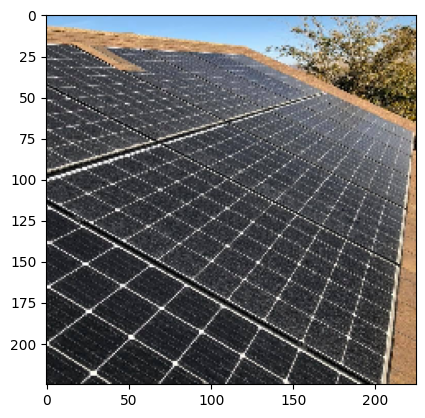

In [110]:
img_clean_2 = load_img(f"raw_data/training-data/dust/Dust (35).jpeg", target_size=(225, 225))
predictImage_multiclass(img_clean_2,model_multi)
plt.imshow(img_clean_2);

1/1 [==============================] - 0s 41ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.216392   0.10012057 0.37158248 0.05869373 0.03040462 0.22280656]
Result: dust


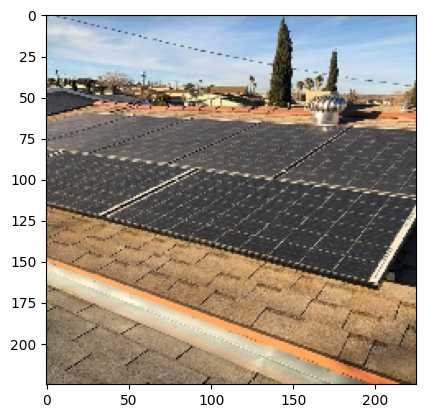

In [111]:
img_clean_2 = load_img(f"raw_data/training-data/dust/Dust (36).jpeg", target_size=(225, 225))
predictImage_multiclass(img_clean_2,model_multi)
plt.imshow(img_clean_2);

1/1 [==============================] - 0s 24ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.39017907 0.28319287 0.18280515 0.05529522 0.02429016 0.06423754]
Result: bird


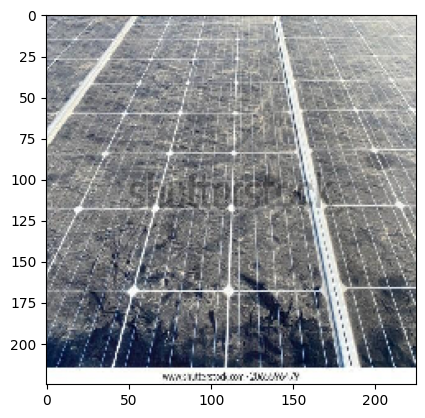

In [112]:
img_clean_2 = load_img(f"raw_data/training-data/dust/Dust (41).jpeg", target_size=(225, 225))
predictImage_multiclass(img_clean_2,model_multi)
plt.imshow(img_clean_2);

1/1 [==============================] - 0s 28ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.32666573 0.53542745 0.0651553  0.03253534 0.01680478 0.02341147]
Result: clean


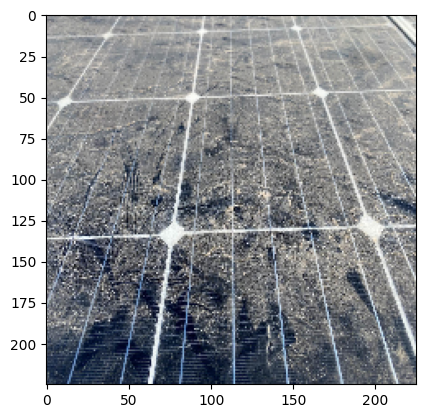

In [113]:
img_clean_2 = load_img(f"raw_data/training-data/dust/Dust (42).jpeg", target_size=(225, 225))
predictImage_multiclass(img_clean_2,model_multi)
plt.imshow(img_clean_2);

1/1 [==============================] - 0s 41ms/step
Probabilities: 
['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']
[0.29367328 0.26009178 0.17470975 0.10624846 0.06760962 0.09766705]
Result: bird


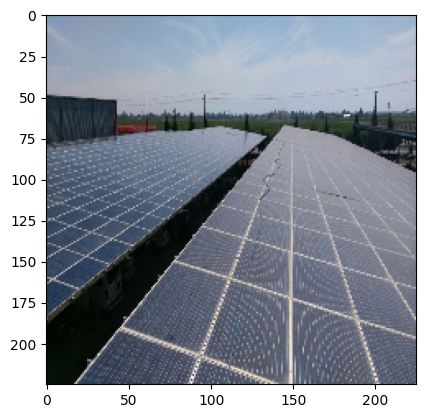

In [117]:
img_clean_2 = load_img(f"raw_data/training-data/dust/Dust (39).jpeg", target_size=(225, 225))
predictImage_multiclass(img_clean_2,model_multi)
plt.imshow(img_clean_2);

## Binary model: Clean vs Snow

In [ ]:
# We'll use a model with the same convolutional layers, but we'll add Augmentation layers before that

model_clean_snow = Sequential()

model_clean_snow.add(layers.Rescaling(1./255, input_shape = (225, 225, 3)))

# Data Augmentation Layers

model_clean_snow.add(layers.RandomFlip("horizontal"))
model_clean_snow.add(layers.RandomZoom(0.1))
model_clean_snow.add(layers.RandomTranslation(0.2, 0.2))
model_clean_snow.add(layers.RandomRotation(0.1))


# Convolutional Layers

model_clean_snow.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding = "same"))
model_clean_snow.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )


model_clean_snow.add(layers.Conv2D(filters = 32, kernel_size = (3,3), input_shape = (225, 225, 3), activation="relu", padding = "same"))
model_clean_snow.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )


model_clean_snow.add(layers.Conv2D(filters = 64, kernel_size = (3,3), input_shape = (225, 225, 3), activation="relu", padding = "same"))
model_clean_snow.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

model_clean_snow.add(layers.Conv2D(filters = 128, kernel_size = (3,3), input_shape = (225, 225, 3), activation="relu", padding = "same"))
model_clean_snow.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

model_clean_snow.add(layers.Flatten())

model_clean_snow.add(layers.Dense(64, activation="relu"))

model_clean_snow.add(layers.Dropout(0.5))

model_clean_snow.add(layers.Dense(1, activation="sigmoid"))